**Preprocessing data**

In [3]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import joblib
nltk.download('stopwords')

# Sentiment analysis reference
# https://www.youtube.com/watch?v=4YGkfAd2iXM&t=2915s

# Displaying stopwords
# print(stopwords.words('english'))

# Loading in data and naming columns to original names as in the dataset
dataset = "/content/drive/MyDrive/sentimentDataset.csv"

naming_col = ['target', 'id', 'date', 'flag', 'user', 'text']

data = pd.read_csv(dataset, names=naming_col, encoding="latin1")

# print(data.columns)

# Renaming columns
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'tweet']

print("Done renaming column names")

# print(data.columns)
# print(data.head())

# Checking for any null values
# data.isnull().sum()
# print(data.shape)

# Number of distributions for positive and negative values
print(data['sentiment'].value_counts())

# sentiment
# 0    800000 Negative values
# 4    800000 Positive values

data.isnull().sum()

# Replacing 4 with 1 (assigning positive sentiment the value of 1)
data.replace({'sentiment': {4: 1}}, inplace=True)
print(data['sentiment'].value_counts())

print("Done setting 0 and 1 to negative and positive")

# sentiment
# 0    800000 Negative values
# 1    800000 Positive values


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Done renaming column names
sentiment
0    800000
4    800000
Name: count, dtype: int64
sentiment
0    800000
1    800000
Name: count, dtype: int64
Done setting 0 and 1 to negative and positive


**Preprocessing data continued (Stemming)**

In [4]:
# Stemming words with NLTK
# https://www.geeksforgeeks.org/python-stemming-words-with-nltk/
'''
Stemming is the process of producing morphological variants of a root/base word.
Some examples of stemming for root word "like" include:

-> "likes"
-> "liked"
-> "likely"
-> "liking"
'''

# Stemming object
ps = PorterStemmer()

stop_words = set(stopwords.words('english'))

# Function to stem all words in the tweet
def stemming(content):

    # Removes every letter in the content that is not a to z letters
    stemmed = re.sub('[^a-zA-Z]', ' ', content)
    stemmed = stemmed.lower()
    stemmed = stemmed.split()

    # How many words are stemmed
    stemmed_count = 0

    stemmed = [ps.stem(word) for word in stemmed if not word in stop_words]

    stemmed = ' '.join(stemmed)

    return stemmed


# Adding a new column called stemmed in the dataset to
data['stemmed'] = data['tweet'].apply(stemming)

print("Done stemming!")


Done stemming!


**Train/Test split** <br>
**Tokenizing data** <br>
**Training model**

In [5]:
# Feature and target split
feature = data['stemmed'].values
target = data['sentiment'].values

# Train and test split of feature and target variables
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.2, stratify=target, random_state=42)

print("Done splitting")

# Vectorizer to convert raw data to matrix of TF-IDF features
# https://stats.stackexchange.com/questions/154660/tfidfvectorizer-should-it-be-used-on-train-only-or-traintest
vectorizer = TfidfVectorizer()

# Vectorizing test and training feature variables
X_train = vectorizer.fit_transform(X_train.tolist())
X_test = vectorizer.transform(X_test.tolist())

print("Done vectorizing")

# Logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

print("Training")

# Train model
logistic_model.fit(X_train, Y_train)

print("Done training!")

X_train_pred = logistic_model.predict(X_train)
acc = accuracy_score(Y_train, X_train_pred)

print("Train Accuracy:", acc)

X_test_pred = logistic_model.predict(X_test)
test_acc = accuracy_score(Y_test, X_test_pred)

print("Test Accuracy:", test_acc)

joblib.dump(logistic_model, '/content/model.pkl')

Done splitting
Done vectorizing
Training
Done training!
Train Accuracy: 0.81021171875
Test Accuracy: 0.778690625


['/content/model.pkl']

**Accuracy, Precision, Recall, and F-1 Score metrics**

In [6]:
from sklearn.metrics import classification_report

print('Classification report')
print(classification_report(Y_test, X_test_pred))

Classification report
              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160000
           1       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



**Confusion matrix**

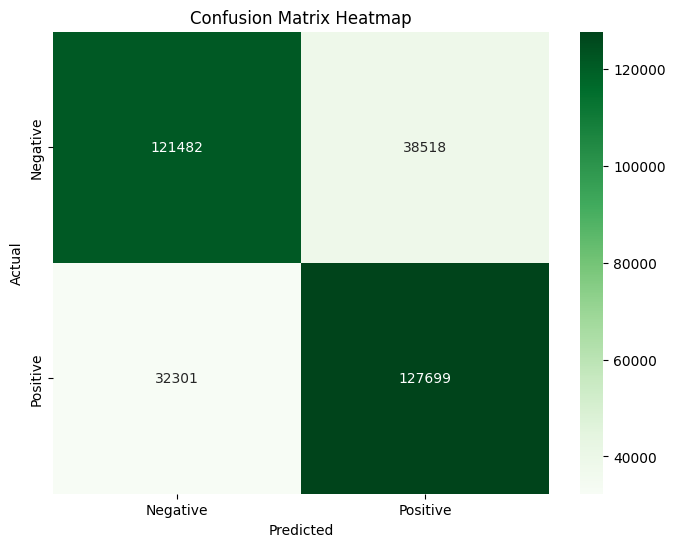

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(Y_test, X_test_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

**Testing pre-trained model**

In [29]:
load_model = joblib.load('/content/model.pkl')

# Sentences to test it out with
# I love rainy days.            ##Positive
# I hate rainy days.            ##Negative
# I like rainy days.            #Supposed to be positive but is negative
# I love to do all the chores but don't like to do the dishes.          ##Positive since the person likes most of the chores but one

sample_sentence = "I hate rainy days."

# Stemming the sentence words
preprocess_sentence = stemming(sample_sentence)

# Tokenizing
tokenized_sentence = vectorizer.transform([preprocess_sentence])

# Prediction
sentence_prediction = load_model.predict(tokenized_sentence)

if sentence_prediction == 0:
  print("The sentence has a negative sentiment :/")
else:
  print("The sentence has a positive sentiment!")

The sentence has a negative sentiment :/
